## <div style="color:white;display:fill;border-radius:8px;background-color:#800080;font-size:150%; letter-spacing:1.0px"><p style="padding: 12px;color:white;"><b><b><span style='color:white'><span style='color:#F1A424'>3 |</span></span></b> Explore</b></p></div>

- **Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling or hypothesis testing task.**

In [36]:
# Importing the necessary libraries
import re
import string
import numpy as np  
import random 
import pandas as pd 
import matplotlib.pyplot as plt 

# Libraries for plotting statistical graphs
import seaborn as sns  
%matplotlib inline

from plotly import graph_objs as go  
import plotly.express as px  
import plotly.figure_factory as ff 
import squarify  
from collections import Counter  

# Load the Text Cleaning Package
import neattext.functions as nfx 

# Python Imaging Library for image processing
from PIL import Image  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

# Scikit-learn classifiers and evaluation metrics for building and assessing machine learning models.
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics  
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report 
from sklearn.compose import ColumnTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier  # Ensemble classifiers
from sklearn.linear_model import RidgeClassifier, SGDClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 

# Libraries for language processing
import nltk  
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

from textblob import TextBlob
import spacy 
from spacy.util import compounding  
from spacy.util import minibatch

from tqdm import tqdm  # Progress bars for tasks
import os  # Operating system functions


# Configure Pandas display options
pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [37]:
#Load the data and previewing the first 5 rows
df = pd.read_csv('../data/interim_data.csv')

df.head()

,Subreddit,reddit_post,clean_post,urls,preprocessed_post,lemma_preprocessed_post,stemma_preprocessed_post,Subjectivity,Polarity,sentiment
0,CPTSD,"I don't know if it was the emotional neglect, the psychological abuse, medical abuse, bullying, the CSA, whatever. I'm a mess right now. I feel like a horrible monster that somewhat a lot of people see as attractive, but under the facade I'm still a monster. As if I was someone who was built for being unlovable and despised, physically and emotionally, since I was born. I keep working and wor...",know emotional neglect psychological abuse medical abuse bullying csa mess right feel like horrible monster somewhat lot people attractive facade monster built unlovable despised physically emotionally born working working feel fit world,[],know emotional neglect psychological abuse medical abuse bullying csa mess right feel like horrible monster somewhat lot people attractive facade monster built unlovable despised physically emotionally born working working feel fit world,know emotional neglect psychological abuse medical abuse bullying csa mess right feel like horrible monster somewhat lot people attractive facade monster built unlovable despised physically emotionally born working working feel fit world,know emot neglect psycholog abus medic abus bulli csa mess right feel like horribl monster somewhat lot peopl attract facad monster built unlov despis physic emot born work work feel fit world,0.501190,0.034524,Positive
1,CPTSD,"See title.\n\nI used to be the person full of hobbies (biking, drawing, reading, writing, walking, gaming) who really disliked people who never knew what to do with their free time and would be clingy. Now I am one of them.\n\nThrough years of hard depression and su.c.dal.ty thanks to cptsd I have stopped all my hobbies. I entrench myself in work and by now also meeting people and sometimes ob...",title person hobbies biking drawing reading writing walking gaming disliked people knew free time clingy years hard depression sucdalty thanks cptsd stopped hobbies entrench work meeting people obligatory projects like drivers license extent leaves free time free time lie couch think pity hate lot way watch netflix hours doom scroll reddit waste time browsing internet try sleep lot better inte...,[],title person hobbies biking drawing reading writing walking gaming disliked people knew free time clingy years hard depression sucdalty thanks cptsd stopped hobbies entrench work meeting people obligatory projects like drivers license extent leaves free time free time lie couch think pity hate lot way watch netflix hours doom scroll reddit waste time browsing internet try sleep lot better inte...,title person hobby biking drawing reading writing walking gaming disliked people knew free time clingy year hard depression sucdalty thanks cptsd stopped hobby entrench work meeting people obligatory project like driver license extent leaf free time free time lie couch think pity hate lot way watch netflix hour doom scroll reddit waste time browsing internet try sleep lot better interested bak...,titl person hobbi bike draw read write walk game dislik peopl knew free time clingi year hard depress sucdalti thank cptsd stop hobbi entrench work meet peopl obligatori project like driver licens extent leav free time free time lie couch think piti hate lot way watch netflix hour doom scroll reddit wast time brows internet tri sleep lot better interest bake game super rare regular walk real i...,0.528098,0.004550,Positive
2,CPTSD,"I was doing yoga for years as a tool to help me back into my body when I was feeling rough as a form of reconnection. I even went as far as becoming trained in teaching, doing a 200hr training. As my trauma symptoms peaked however yoga would actually start having the reverse effect and would dissociate me. (In retrospect I wonder if I was in fact being dissociated the whole time.)\n\nStarted a...",yoga years tool help body feeling rough form reconnection went far

In [38]:
# drop the url column
df.drop('urls', axis=1, inplace=True)

df.head()

,Subreddit,reddit_post,clean_post,preprocessed_post,lemma_preprocessed_post,stemma_preprocessed_post,Subjectivity,Polarity,sentiment
0,CPTSD,"I don't know if it was the emotional neglect, the psychological abuse, medical abuse, bullying, the CSA, whatever. I'm a mess right now. I feel like a horrible monster that somewhat a lot of people see as attractive, but under the facade I'm still a monster. As if I was someone who was built for being unlovable and despised, physically and emotionally, since I was born. I keep working and wor...",know emotional neglect psychological abuse medical abuse bullying csa mess right feel like horrible monster somewhat lot people attractive facade monster built unlovable despised physically emotionally born working working feel fit world,know emotional neglect psychological abuse medical abuse bullying csa mess right feel like horrible monster somewhat lot people attractive facade monster built unlovable despised physically emotionally born working working feel fit world,know emotional neglect psychological abuse medical abuse bullying csa mess right feel like horrible monster somewhat lot people attractive facade monster built unlovable despised physically emotionally born working working feel fit world,know emot neglect psycholog abus medic abus bulli csa mess right feel like horribl monster somewhat lot peopl attract facad monster built unlov despis physic emot born work work feel fit world,0.501190,0.034524,Positive
1,CPTSD,"See title.\n\nI used to be the person full of hobbies (biking, drawing, reading, writing, walking, gaming) who really disliked people who never knew what to do with their free time and would be clingy. Now I am one of them.\n\nThrough years of hard depression and su.c.dal.ty thanks to cptsd I have stopped all my hobbies. I entrench myself in work and by now also meeting people and sometimes ob...",title person hobbies biking drawing reading writing walking gaming disliked people knew free time clingy years hard depression sucdalty thanks cptsd stopped hobbies entrench work meeting people obligatory projects like drivers license extent leaves free time free time lie couch think pity hate lot way watch netflix hours doom scroll reddit waste time browsing internet try sleep lot better inte...,title person hobbies biking drawing reading writing walking gaming disliked people knew free time clingy years hard depression sucdalty thanks cptsd stopped hobbies entrench work meeting people obligatory projects like drivers license extent leaves free time free time lie couch think pity hate lot way watch netflix hours doom scroll reddit waste time browsing internet try sleep lot better inte...,title person hobby biking drawing reading writing walking gaming disliked people knew free time clingy year hard depression sucdalty thanks cptsd stopped hobby entrench work meeting people obligatory project like driver license extent leaf free time free time lie couch think pity hate lot way watch netflix hour doom scroll reddit waste time browsing internet try sleep lot better interested bak...,titl person hobbi bike draw read write walk game dislik peopl knew free time clingi year hard depress sucdalti thank cptsd stop hobbi entrench work meet peopl obligatori project like driver licens extent leav free time free time lie couch think piti hate lot way watch netflix hour doom scroll reddit wast time brows internet tri sleep lot better interest bake game super rare regular walk real i...,0.528098,0.004550,Positive
2,CPTSD,"I was doing yoga for years as a tool to help me back into my body when I was feeling rough as a form of reconnection. I even went as far as becoming trained in teaching, doing a 200hr training. As my trauma symptoms peaked however yoga would actually start having the reverse effect and would dissociate me. (In retrospect I wonder if I was in fact being dissociated the whole time.)\n\nStarted a...",yoga years tool help body feeling rough form reconnection went far trained te

In [39]:
#To get an overview of the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27666 entries, 0 to 27665
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subreddit                 27666 non-null  object 
 1   reddit_post               27666 non-null  object 
 2   clean_post                27662 non-null  object 
 3   preprocessed_post         27662 non-null  object 
 4   lemma_preprocessed_post   27662 non-null  object 
 5   stemma_preprocessed_post  27662 non-null  object 
 6   Subjectivity              27666 non-null  float64
 7   Polarity                  27666 non-null  float64
 8   sentiment                 27666 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


In [40]:
# Check for null values in the cleaned data
df.isna().sum()

Subreddit                   0
reddit_post                 0
clean_post                  4
preprocessed_post           4
lemma_preprocessed_post     4
stemma_preprocessed_post    4
Subjectivity                0
Polarity                    0
sentiment                   0
dtype: int64

In [41]:
#Check for duplicated values in the cleaned data
df.duplicated().sum()

0

In [42]:
# Handling the missing values in the cleaned data

# Check the rows with missing values in the specified columns
rows_with_missing_values = df[df[['clean_post', 'preprocessed_post', 'lemma_preprocessed_post', 'stemma_preprocessed_post']].isnull().any(axis=1)]

# Display the rows with missing values
rows_with_missing_values

,Subreddit,reddit_post,clean_post,preprocessed_post,lemma_preprocessed_post,stemma_preprocessed_post,Subjectivity,Polarity,sentiment
832,CPTSD,#NAME?,NaN,NaN,NaN,NaN,0.0,0.0,Neutral
8539,suicidewatch,#NAME?,NaN,NaN,NaN,NaN,0.0,0.0,Neutral
18211,suicidewatch,I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do this I can't do t...,NaN,NaN,NaN,NaN,0.0,0.0,Neutral
20977,suicidewatch,Done Just done with everything.,NaN,NaN,NaN,NaN,0.0,0.0,Neutral


In [43]:
# Since the number of missing values is small, we drop the rows with missing values
df.dropna(inplace=True)

# Check to see if the missing values have been handled
df.isna().sum()

Subreddit                   0
reddit_post                 0
clean_post                  0
preprocessed_post           0
lemma_preprocessed_post     0
stemma_preprocessed_post    0
Subjectivity                0
Polarity                    0
sentiment                   0
dtype: int64

## <b>3.1 <span style='color:#F1A424'>|</span> Distribution of Subreddits</b>
We do this to understand the distribution of posts across different subreddits.

In [44]:
df['Subreddit'].value_counts()

Subreddit
suicidewatch     21399
socialanxiety     3736
alcoholism        1426
CPTSD              992
diagnosedPTSD      109
Name: count, dtype: int64

The above summary offers insights into how posts are distributed among various subreddits in our dataset. The numerical values indicate the post counts for each respective subreddit, providing an understanding of the representation of each subreddit in our data.

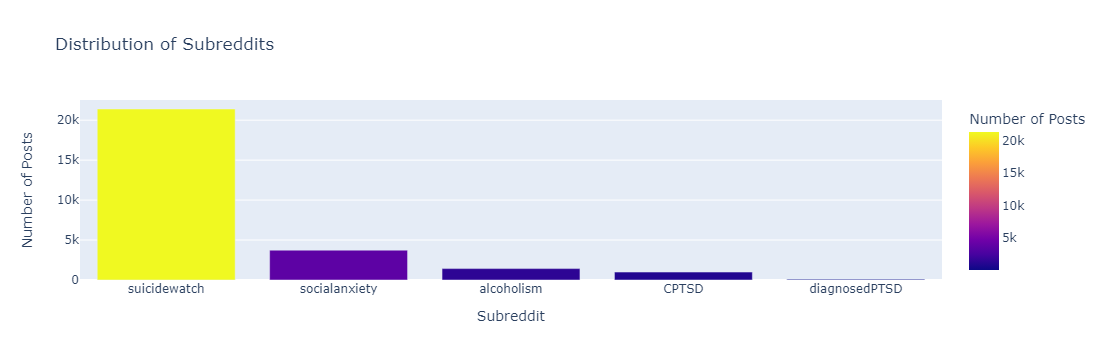

In [45]:
# Plot for the distribution of  the Subreddits

subreddit_distribution = df['Subreddit'].value_counts().reset_index()
subreddit_distribution.columns = ['Subreddit', 'Number of Posts']

# Create a bar plot with a colorful palette
fig = px.bar(subreddit_distribution, x='Subreddit', y='Number of Posts', title='Distribution of Subreddits',
             color='Number of Posts', color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(coloraxis_colorbar=dict(title='Number of Posts'))
fig.show()

## <b>3.2 <span style='color:#F1A424'>|</span> Text statistics</b>
In this step we will be analyzing the body of text. By doing so we get insights on the structure, complexity, and characteristics of the text data.

## 3.2.1 Most Common Words

In [46]:
# Word Frequency: this involves counting the occurrence of each unique word in a text.

# Global Analysis using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer: this is used to convert a collection of text documents to a matrix of token counts.
vectorizer = CountVectorizer()

# Fit and transform the corpus
X = vectorizer.fit_transform(df['clean_post'].astype(str))

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum the occurrences of each word across all posts
global_word_frequencies = X.sum(axis=0).A1

# Create a dictionary of global word frequencies
global_word_freq_dict = dict(zip(feature_names, global_word_frequencies))

# Display global word frequency for the top 10 words
print("Global Word Frequency using CountVectorizer:")
print(sorted(global_word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:10])

# Detailed Analysis using NLTK for the first row

# Get the tokens for the first row using NLTK's word_tokenize
tokens = word_tokenize(df['clean_post'].iloc[0])

# Remove stopwords and convert to lowercase
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Calculate word frequencies using NLTK's FreqDist
fdist = FreqDist(filtered_words)

# Display detailed word frequency for the top 10 words in the first row
print("Detailed Word Frequency for the First Row using NLTK:")
print(fdist.most_common(10))

Global Word Frequency using CountVectorizer:
[('like', 29700), ('want', 28180), ('feel', 24646), ('know', 24158), ('life', 21095), ('people', 16811), ('time', 14074), ('going', 13372), ('think', 11771), ('friends', 10354)]
Detailed Word Frequency for the First Row using NLTK:
[('abuse', 2), ('feel', 2), ('monster', 2), ('working', 2), ('know', 1), ('emotional', 1), ('neglect', 1), ('psychological', 1), ('medical', 1), ('bullying', 1)]


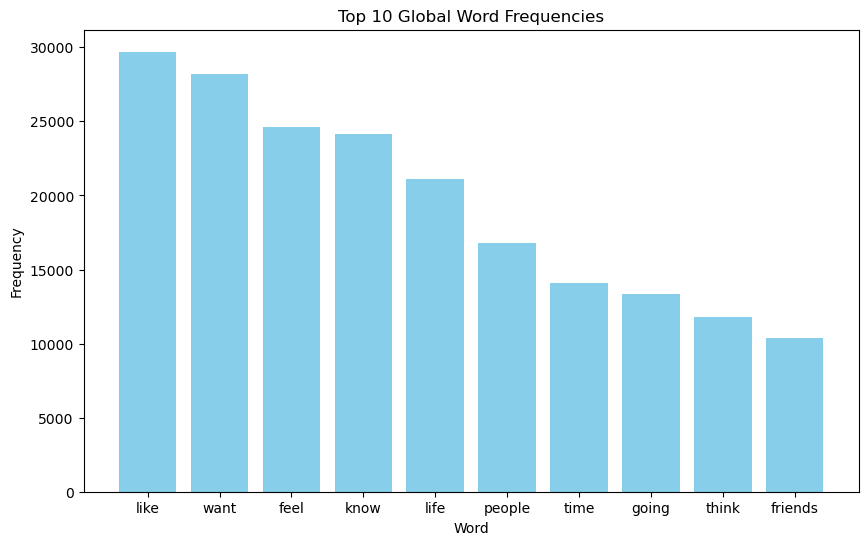

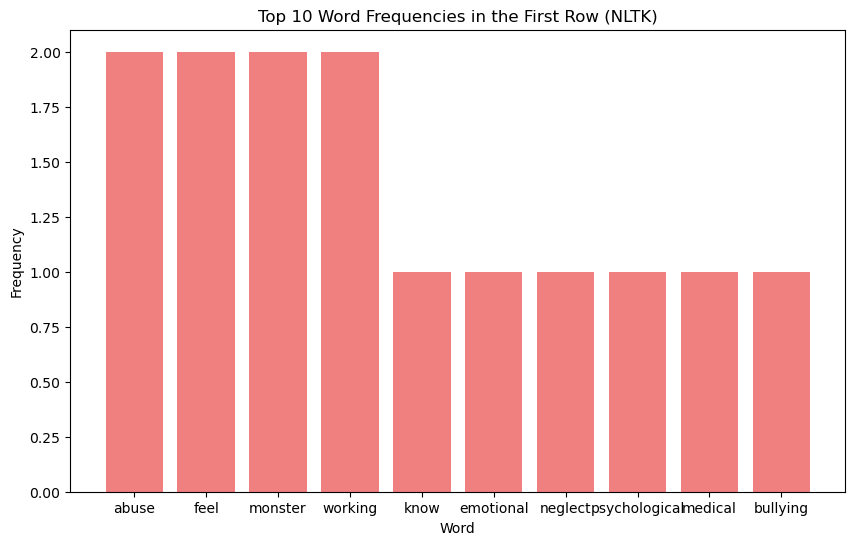

In [47]:
# Plot global word frequency
global_top_words = sorted(global_word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
global_word_labels, global_word_counts = zip(*global_top_words)

plt.figure(figsize=(10, 6))
plt.bar(global_word_labels, global_word_counts, color='skyblue')
plt.title('Top 10 Global Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Plot detailed word frequency
detailed_word_labels, detailed_word_counts = zip(*fdist.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(detailed_word_labels, detailed_word_counts, color='lightcoral')
plt.title('Top 10 Word Frequencies in the First Row (NLTK)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

## <b>3.2.2 <span style='color:#F1A424'>|</span> Average Length of Sentences</b>

In [48]:
# Average Length of Sentences: this calculates the average number of words or characters per sentence in a text.

# Tokenize sentences and words
df['sentences'] = df['clean_post'].apply(sent_tokenize)
df['words'] = df['clean_post'].apply(word_tokenize)

# Calculate average sentence length
df['average_sentence_length'] = df['sentences'].apply(lambda sentences: sum(len(sentence.split()) for sentence in sentences) / len(sentences) if len(sentences) > 0 else 0)

# Remove stopwords for accurate word frequency analysis
stop_words = set(stopwords.words('english'))
df['filtered_words'] = df['words'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

# Calculate word frequency
df['word_freq'] = df['filtered_words'].apply(lambda filtered_words: FreqDist(filtered_words))

# Display results
print("Average Sentence Length:", df['average_sentence_length'].mean())

Average Sentence Length: 64.70287759381101


## <b>3.2.3 <span style='color:#F1A424'>|</span> Text Length</b>

count    27662.000000
mean       432.935869
std        468.969596
min          4.000000
25%        152.000000
50%        298.000000
75%        545.000000
max      11715.000000
Name: text_length, dtype: float64

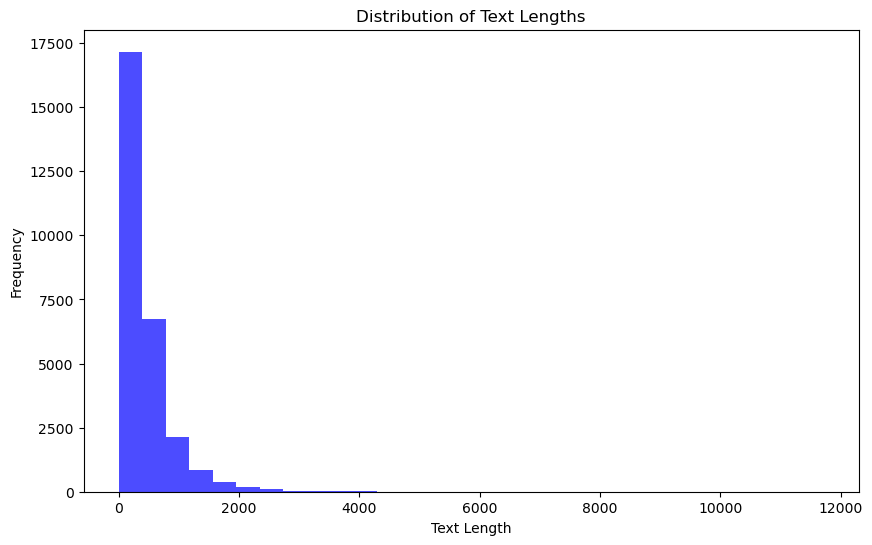

In [49]:
# Text Length: this done to see the length of text entries in a dataset.
df['text_length'] = df['clean_post'].apply(len)

# Display the descriptive statistic
display(df['text_length'].describe())

# plot the distribution of the text lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

The dataset contains a diverse range of text lengths, with an average length of around 433 characters. While a number of posts have shorter lengths (around 100-300 characters), there are also posts with much longer lengths.

## <b>3.2.4 <span style='color:#F1A424'>|</span> Word Count</b>

count    27662.000000
mean        64.266286
std         68.230761
min          1.000000
25%         23.000000
50%         45.000000
75%         81.000000
max       1694.000000
Name: word_counts, dtype: float64

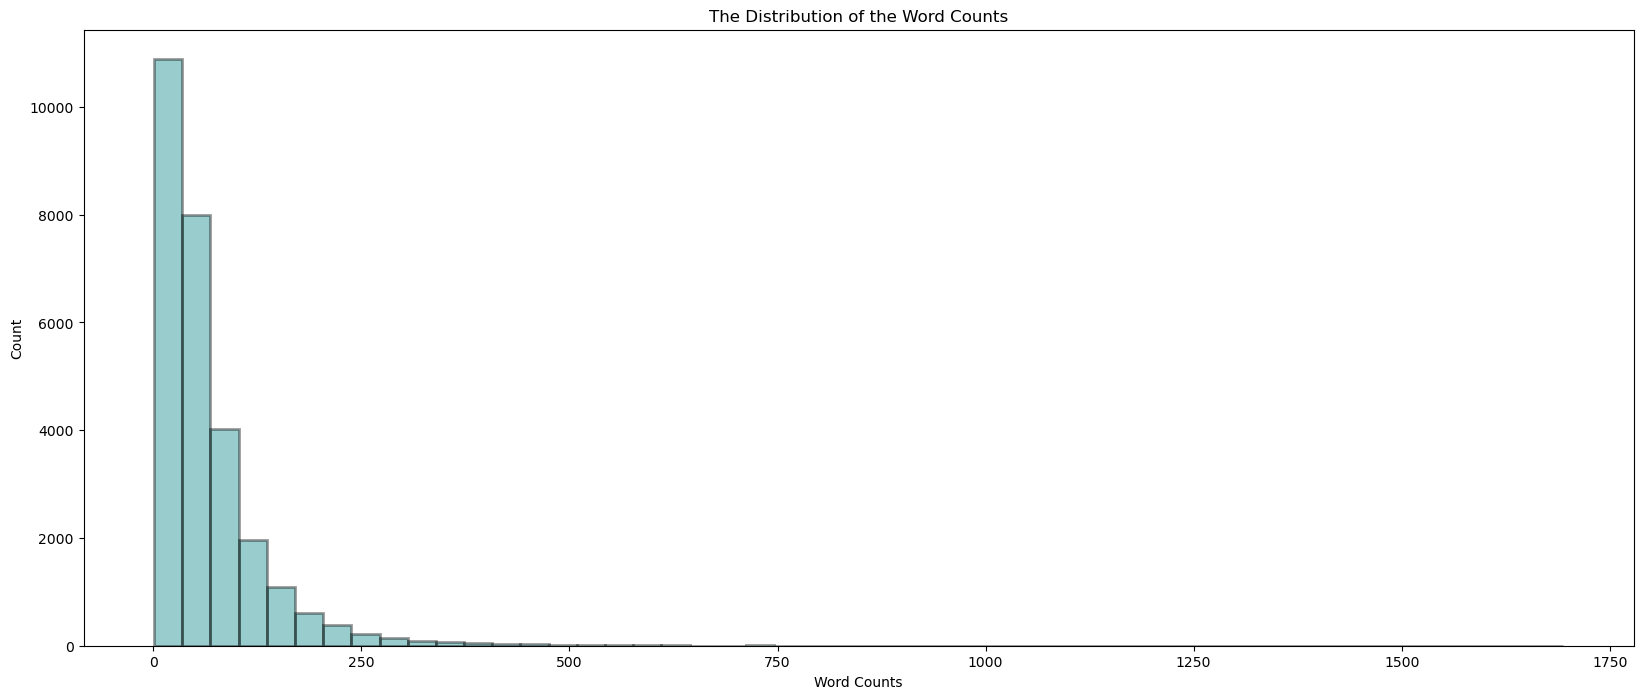

In [50]:
# Word Count: this calculates the number of words present in a given text
df['word_counts'] = df['preprocessed_post'].apply(lambda x: len(str(x).split()))

# Display the descriptive statistic
display(df['word_counts'].describe())

# plot word_counts
plt.figure(figsize=(20,8))
sns.distplot(df['word_counts'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('The Distribution of the Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Count')

plt.show()

The dataset exhibits a wide range of word counts, with an average of approximately 64 words per post. There are posts with very short word counts (1 word) as well as a few with much higher word counts (up to 1,694 words).

## <b>3.3 <span style='color:#F1A424'>|</span> Sentiment Analysis</b>

### <b>3.3.1 <span style='color:#F1A424'>|</span> Distribution of Sentiments</b>

In [51]:
df['sentiment'].value_counts()

sentiment
Negative    14784
Positive    11533
Neutral      1345
Name: count, dtype: int64

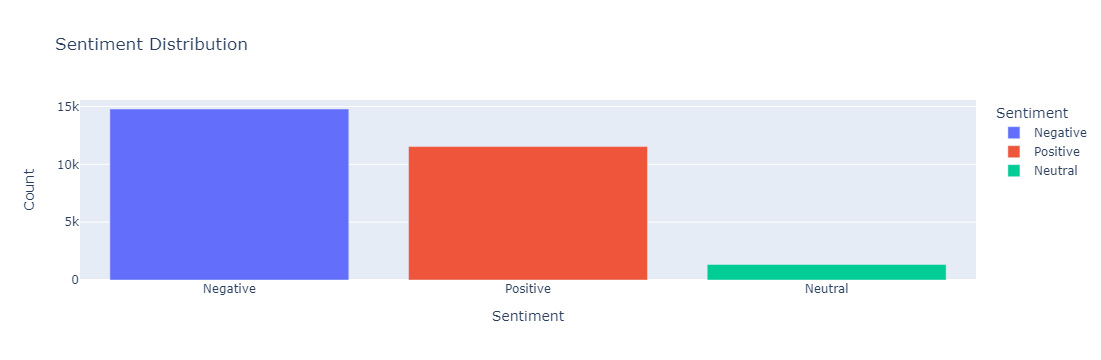

In [52]:
# Calculate sentiment counts
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Plotting the bar chart using Plotly
fig = px.bar(sentiment_counts, x='sentiment', y='count', color='sentiment',
             labels={'count': 'Count', 'sentiment': 'Sentiment'},
             title='Sentiment Distribution')

# Show the plot
fig.show()


The majority of sentiments are categorized as negative, positive sentiments follow closely with neutral sentiments making up a smaller proportion

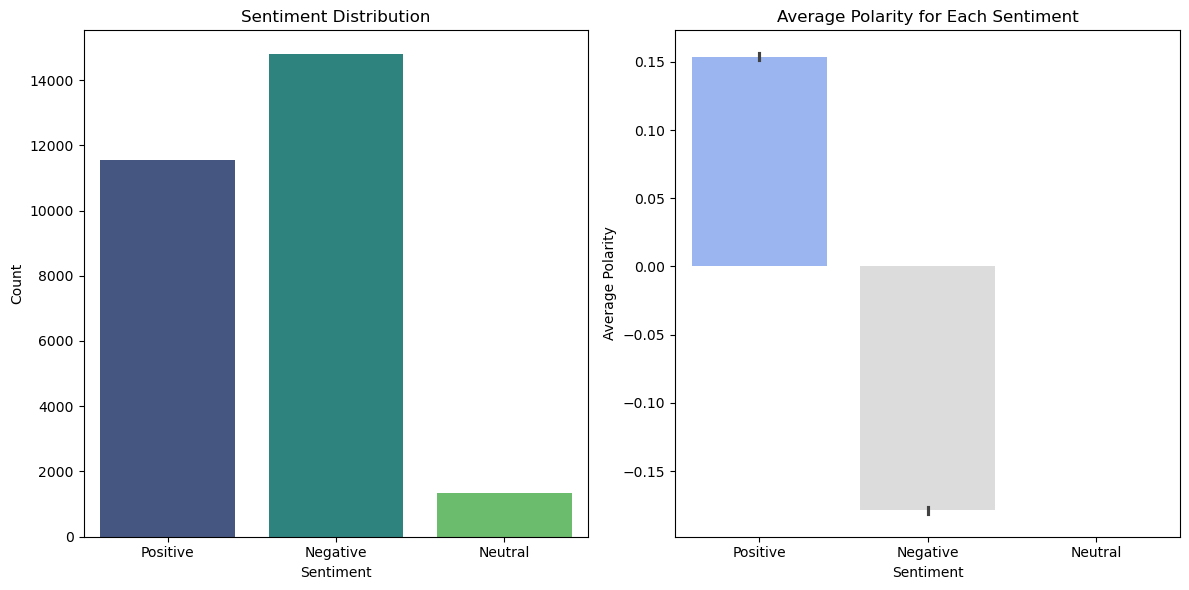

In [53]:
# Plot both sentiment and polarity
plt.figure(figsize=(12, 6))

# Plot Sentiment Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Plot Average Polarity for Each Sentiment
plt.subplot(1, 2, 2)
sns.barplot(x='sentiment', y='Polarity', data=df, palette='coolwarm')
plt.title('Average Polarity for Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Polarity')

plt.tight_layout()
plt.show()

## <b>3.4 <span style='color:#F1A424'>|</span> Text complexity analysis </b>
Text complexity analysis involves evaluating various linguistic and structural features of a text to determine its level of complexity. 
We will explore text complexity measures, such as readability scores. 
Readability scores are numerical indicators that assess the complexity of written text and estimate the ease with which a reader can comprehend the content. 

In [54]:
import textstat
df['flesch_kincaid_grade'] = df['clean_post'].apply(textstat.flesch_kincaid_grade)

# Display the results for the selected readability scores

print("\nFlesch-Kincaid Grade Level:")
df['flesch_kincaid_grade'].describe()


Flesch-Kincaid Grade Level:


count    27662.000000
mean        28.517425
std         27.268519
min         -3.500000
25%         12.300000
50%         21.200000
75%         35.600000
max        664.400000
Name: flesch_kincaid_grade, dtype: float64

The average Flesch-Kincaid Grade Level of 28.52 suggests that the text in your dataset tends to be more complex, potentially requiring a higher level of education to understand.

## <b>3.5 <span style='color:#F1A424'>|</span> Correlation matrix </b>

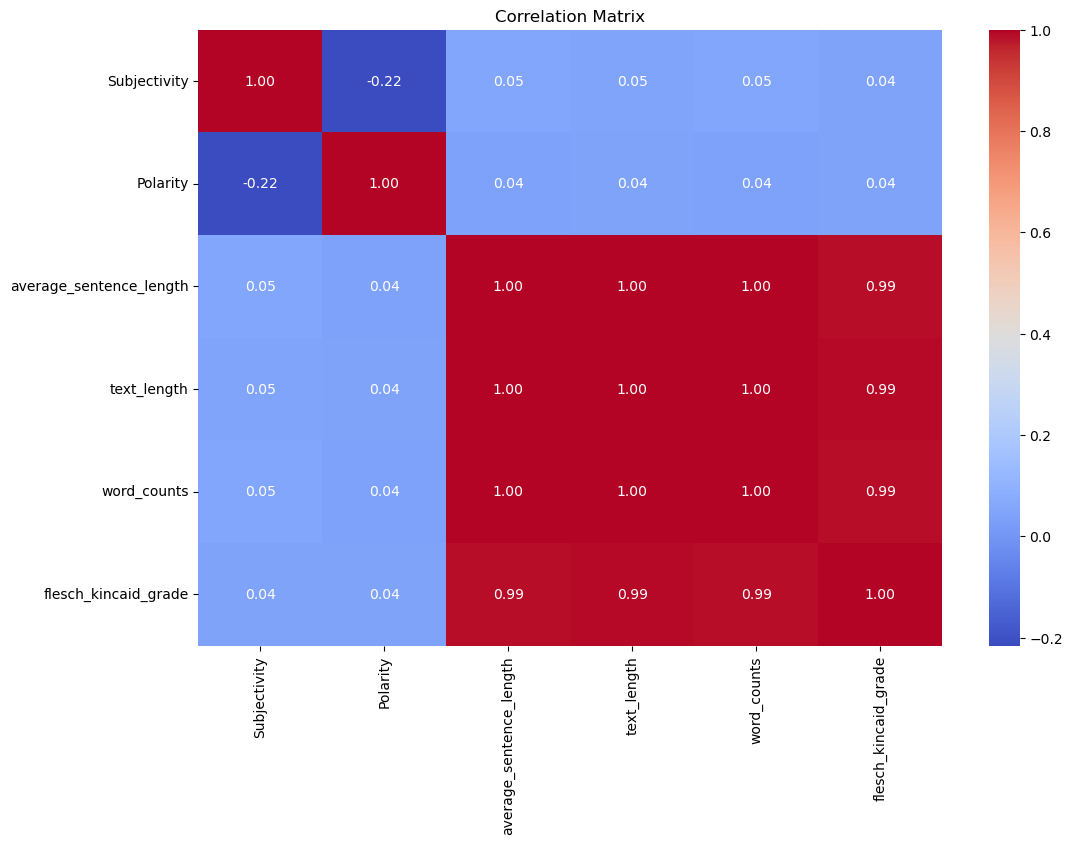

In [55]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numerical features
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## <b>3.6 <span style='color:#F1A424'>|</span> Word Cloud </b>
A word cloud is a visual representation of text data where words are displayed in different sizes, typically based on their frequency or importance within the text.

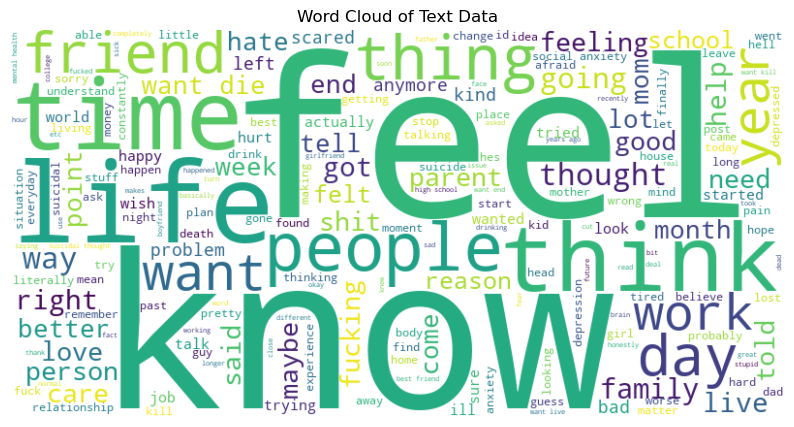

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your text data is in the 'clean_post' column of DataFrame 'df'
text_data = ' '.join(df['clean_post'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_data)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [58]:
df = df[['clean_post', 'preprocessed_post', 'lemma_preprocessed_post', 'stemma_preprocessed_post', 'sentiment', 'Subjectivity', 'Polarity']]

# Save the DataFrame to a CSV file named 'mental_health_data.csv' in the '../data/' directory
df.to_csv('../data/mental_health_data.csv', index=False)